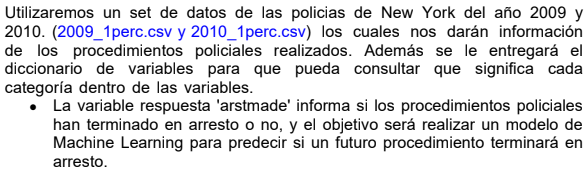

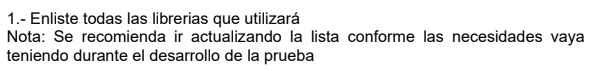

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

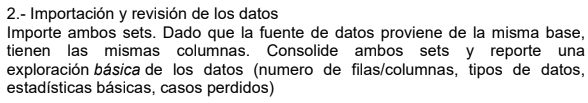

In [225]:
# importar ambos csv 
df_2009 = pd.read_csv('2009_1perc.csv')
df_2010 = pd.read_csv('2010_1perc.csv')

In [226]:
# consolidar ambos csv en un solo dataframe
df = pd.concat([df_2009, df_2010])

In [227]:
# importar libreria para ver todas las columnas
from IPython.display import display, Markdown

type(df.columns)

df.columns.values


array(['Unnamed: 0', 'year', 'pct', 'ser_num', 'datestop', 'timestop',
       'recstat', 'inout', 'trhsloc', 'perobs', 'crimsusp', 'perstop',
       'typeofid', 'explnstp', 'othpers', 'arstmade', 'arstoffn',
       'sumissue', 'sumoffen', 'compyear', 'comppct', 'offunif',
       'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept',
       'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun',
       'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep',
       'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other',
       'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm',
       'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout',
       'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc',
       'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim',
       'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl',
       'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis',
       'sb_other', 'repcmd', 'revcmd', 'rf_furt', 'rf_bu

In [228]:
df.head(10)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,,,M,B,7111984,24,5,9,145,BK,BR,M,,L,,,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,,BRONX,,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,,N,,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,,L,,,STREET,,,63 STREET,37 AVENUE,,QUEENS,,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,,S,M,Q,7031987,21,6,3,220,BR,BR,M,,L,,,STREET,,,WATSON AVENUE,WHEELER AVENUE,,BRONX,,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,,,M,B,3131986,22,5,5,120,BK,BR,T,,L,,,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,,BROOKLYN,,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,,,M,Q,9221991,18,5,6,165,BK,BR,M,,L,,,SIDEWALK,,,53 AVENUE,108 STREET,,QUEENS,,,110,H,,,1024535,0209890,CM,1,20
5,261097,2009,14,5194,5222009,2039,1,I,T,7.0,CPFI,1,V,Y,N,N,,N,,0,0,N,I,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,861,861,Y,N,V,S,M,B,7211961,47,5,8,175,BK,BR,M,,L,,,TURNSTILE,,,8 AVENUE,WEST 34 STREET,,MANHATTAN,,,14,F,16,,0986061,0213320,CM,1,26
6,538417,2009,67,11758,11242009,109,1,O,P,5.0,FEL,5,P,Y,N,N,,N,,0,0,Y,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,176,67,Y,N,,,M,B,12181989,20,5,11,170,BK,BR,T,,L,,,SIDEWALK,,,RUTLAND ROAD,EAST 93 STREET,,BROOKLYN,,,67,N,,,1004543,0180604,CM,1,20
7,480540,2009,75,27535,10162009,2045,1,I,H,2.0,CRIM TRES,5,V,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,802,802,N,N,,,F,B,12311900,16,5,7,140,BK,BR,M,,L,,,NYCHA,504,ASHFORD STREET,BLAKE AVENUE,SUTTER AVENUE,,BROOKLYN,,,75,G,,,1016397,0183357,CM,1,31
8,568686,2009,34,7125,12172009,2225,A,O,P,2.0,GRAND LARCENY,10,P,Y,Y,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,34,34,N,N,,S,M,W,9291990,19,6,1,199,BK,BR,M,,L,,,STREET,,,BROADWAY,WEST 190 STREET,,MANHATTAN,,,34,B,4,,1002850,0251332,CM,1,45
9,184508,2009,67,3355,4072009,215,A,O,P,1.0,FEL,5,P,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,Y,N,N,N,N,N,176,176,N,N,,,M,B,6021983,25,5,10,160,BK,BR,T,,L,,,STREET,,,RUTLAND ROAD,EAST 94 STREET,,BROOKLYN,,,67,N,,,1004742,0180773,CM

In [229]:
df.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(16), object(95)
memory usage: 10.2+ MB


In [231]:
# Obtener la suma de los valores nulos por columna
columnas_con_nulos = df.isnull().sum()

# Filtrar las columnas que tienen valores nulos
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]

# Imprimir las columnas con valores nulos
print("Columnas con datos faltantes:")
print(columnas_con_nulos)


Columnas con datos faltantes:
premname    1
stinter     1
dtype: int64


In [232]:
# eliminar las columnas con valores nulos
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 110 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(16), object(93)
memory usage: 10.0+ MB


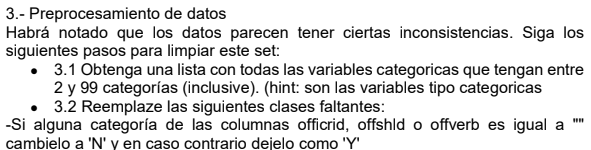

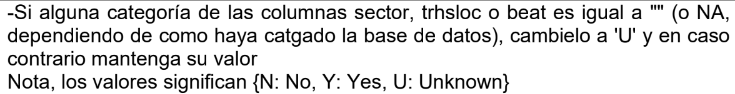

# 3.1

In [233]:
# Obtener una lista con todas las columnas que tenga unique entre 2 y 99 y que sean tipo object
columnas_categoricas = df.nunique()[(df.nunique() >= 2) & (df.nunique() <= 99) & (df.dtypes == 'object') ]
columnas_categoricas

recstat      2
inout        2
trhsloc      4
typeofid     4
explnstp     2
            ..
city         7
sector      19
beat        64
dettypcm     2
linecm       3
Length: 74, dtype: int64

In [234]:
# Setear las columnas categoricas
df[columnas_categoricas.index] = df[columnas_categoricas.index].astype('category')
print(f"Se castearon {columnas_categoricas.count()} columnas a tipo category")
print()

df.info()

Se castearon 74 columnas a tipo category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 110 entries, Unnamed: 0 to detailcm
dtypes: category(74), float64(1), int64(16), object(19)
memory usage: 4.2+ MB


# 3.2

In [235]:
# tipo de datos de la columna officrid
print(f"La columna officrid es de tipo : {df['officrid'].dtype}")
print(f"Los valores unicos de officrid son: {df['officrid'].unique()}")
# tipo de datos de la columna offshld
print(f"La columna offshld es de tipo : {df['offshld'].dtype}")
print(f"Los valores unicos de offshld son: {df['offshld'].unique()}")

# tipo de datos de la columna offverb
print(f"La columna offverb es de tipo : {df['offverb'].dtype}")
print(f"Los valores unicos de offverb son: {df['offverb'].unique()}")

La columna officrid es de tipo : category
Los valores unicos de officrid son: [' ', 'I']
Categories (2, object): [' ', 'I']
La columna offshld es de tipo : category
Los valores unicos de offshld son: [' ', 'S']
Categories (2, object): [' ', 'S']
La columna offverb es de tipo : category
Los valores unicos de offverb son: [' ', 'V']
Categories (2, object): [' ', 'V']


In [236]:
# -Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'
df['officrid'] = df['officrid'].apply(lambda x: 'N' if x == ' ' else 'Y')
df['offshld'] = df['offshld'].apply(lambda x: 'N' if x == ' ' else 'Y')
df['offverb'] = df['offverb'].apply(lambda x: 'N' if x == ' ' else 'Y')

In [237]:
print(f"La columna officrid es de tipo : {df['officrid'].dtype}")
print(f"Los valores unicos de officrid ahora son: {df['officrid'].unique()}")
print()

print(f"La columna offshld es de tipo : {df['offshld'].dtype}")
print(f"Los valores unicos de offshld ahora son: {df['offshld'].unique()}")
print()

print(f"La columna offverb es de tipo : {df['offverb'].dtype}")
print(f"Los valores unicos de offverb ahora son: {df['offverb'].unique()}")

La columna officrid es de tipo : category
Los valores unicos de officrid ahora son: ['N', 'Y']
Categories (2, object): ['N', 'Y']

La columna offshld es de tipo : category
Los valores unicos de offshld ahora son: ['N', 'Y']
Categories (2, object): ['N', 'Y']

La columna offverb es de tipo : category
Los valores unicos de offverb ahora son: ['N', 'Y']
Categories (2, object): ['N', 'Y']


In [238]:
# tipo de datos de la columna sector
print(f"La columna sector es de tipo : {df['sector'].dtype}")
print(f"La columna sector tiene {df['sector'].isnull().sum()} valores nulos")
print(f"Los valores unicos de sector son: {df['sector'].unique()}")
print()

# tipo de datos de la columna trhsloc
print(f"La columna trhsloc es de tipo : {df['trhsloc'].dtype}")
print(f"La columna trhsloc tiene {df['trhsloc'].isnull().sum()} valores nulos")
print(f"Los valores unicos de trhsloc son: {df['trhsloc'].unique()}")
print()
# tipo de datos de la columna beat

print(f"La columna beat es de tipo : {df['beat'].dtype}")
print(f"La columna beat tiene {df['beat'].isnull().sum()} valores nulos")
print(f"Los valores unicos de beat son: {df['beat'].unique()}")

La columna sector es de tipo : category
La columna sector tiene 0 valores nulos
Los valores unicos de sector son: ['G', 'J', 'E', 'H', 'F', ..., 'T', 'K', 'Q', 'R', 'U']
Length: 19
Categories (19, object): [' ', 'A', 'B', 'C', ..., 'Q', 'R', 'T', 'U']

La columna trhsloc es de tipo : category
La columna trhsloc tiene 0 valores nulos
Los valores unicos de trhsloc son: ['P', 'T', 'H', ' ']
Categories (4, object): [' ', 'H', 'P', 'T']

La columna beat es de tipo : category
La columna beat tiene 0 valores nulos
Los valores unicos de beat son: ['7', ' ', '4', '16', '5', ..., '  21', '  25', '  61', '  41', '  42']
Length: 64
Categories (64, object): [' ', '   1', '   2', '   3', ..., '62', '7', '8', '9']


In [239]:
# Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA,
# dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso
# contrario mantenga su valor

df['sector'] = df['sector'].apply(lambda x: 'U' if x == ' ' else x)
df['sector'] = df['sector'].astype('category')
df['trhsloc'] = df['trhsloc'].apply(lambda x: 'U' if x == ' ' else x)
df['trhsloc'] = df['trhsloc'].astype('category')
df['beat'] = df['beat'].apply(lambda x: 'U' if x == ' ' else x)
df['beat'] = df['beat'].astype('category')


In [240]:
# tipo de datos de la columna sector

print(f"La columna sector es de tipo : {df['sector'].dtype}")
print(f"La columna sector tiene {df['sector'].isnull().sum()} valores nulos")
print(f"Los valores unicos de sector son: {df['sector'].unique()}")
print()

# tipo de datos de la columna trhsloc
print(f"La columna trhsloc es de tipo : {df['trhsloc'].dtype}")
print(f"La columna trhsloc tiene {df['trhsloc'].isnull().sum()} valores nulos")
print(f"Los valores unicos de trhsloc son: {df['trhsloc'].unique()}")
print()
# tipo de datos de la columna beat

print(f"La columna beat es de tipo : {df['beat'].dtype}")
print(f"La columna beat tiene {df['beat'].isnull().sum()} valores nulos")
print(f"Los valores unicos de beat son: {df['beat'].unique()}")

La columna sector es de tipo : category
La columna sector tiene 0 valores nulos
Los valores unicos de sector son: ['G', 'J', 'E', 'H', 'F', ..., 'U', 'T', 'K', 'Q', 'R']
Length: 18
Categories (18, object): ['A', 'B', 'C', 'D', ..., 'Q', 'R', 'T', 'U']

La columna trhsloc es de tipo : category
La columna trhsloc tiene 0 valores nulos
Los valores unicos de trhsloc son: ['P', 'T', 'H', 'U']
Categories (4, object): ['U', 'H', 'P', 'T']

La columna beat es de tipo : category
La columna beat tiene 0 valores nulos
Los valores unicos de beat son: ['7', 'U', '4', '16', '5', ..., '  21', '  25', '  61', '  41', '  42']
Length: 64
Categories (64, object): ['U', '   1', '   2', '   3', ..., '62', '7', '8', '9']


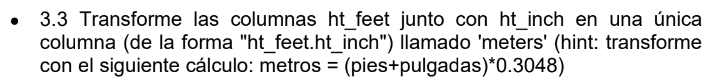

# 3.3

In [241]:
# Transforme las columnas ht_feet junto con ht_inch en una única
# columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme
# con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

df['meters'] = (df['ht_feet'] + df['ht_inch'])*0.3048
df['meters']

0       4.2672
1       3.0480
2       2.7432
3       3.0480
4       3.3528
         ...  
6008    4.5720
6009    3.6576
6010    1.8288
6011    4.8768
6012    2.1336
Name: meters, Length: 11825, dtype: float64

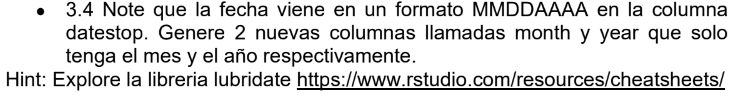

# 3.4

In [242]:
# formato original de fecha
df['datestop']

0        4032009
1       10292009
2       10062009
3        1232009
4       12132009
          ...   
6008     9262010
6009     7302010
6010     4302010
6011    11232010
6012     1062010
Name: datestop, Length: 11825, dtype: int64

In [243]:
# formato de fecha deseado
df['datestop'] = pd.to_datetime(df['datestop'], format='%m%d%Y')
df['datestop']

0      2009-04-03
1      2009-10-29
2      2009-10-06
3      2009-12-03
4      2009-12-13
          ...    
6008   2010-09-26
6009   2010-07-30
6010   2010-04-30
6011   2010-11-23
6012   2010-10-06
Name: datestop, Length: 11825, dtype: datetime64[ns]

In [244]:
df['month'] = df['datestop'].dt.month
df['year'] = df['datestop'].dt.year

df[['datestop', 'month', 'year']]

,datestop,month,year
0,2009-04-03,4,2009
1,2009-10-29,10,2009
2,2009-10-06,10,2009
3,2009-12-03,12,2009
4,2009-12-13,12,2009
...,...,...,...
6008,2010-09-26,9,2010
6009,2010-07-30,7,2010
6010,2010-04-30,4,2010
6011,2010-11-23,11,2010


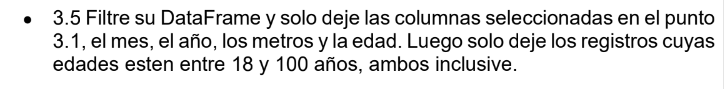

# 3.5

In [245]:
# Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. 
# Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [246]:
#convertir columnas_categoricas a array
columnas_categoricas = columnas_categoricas.index.to_list()

# crear array con columnas extras
columnas_extras = ['month', 'year', 'meters', 'age']

# concatenar ambos arrays
columnas_seleccionadas = columnas_categoricas + columnas_extras

In [247]:
# dejar solo las columnas_categoricas
df_final = df[columnas_seleccionadas ]

In [248]:
df_final.columns

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap',
       'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton',
       'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves',
       'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr',
       'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv',
       'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim',
       'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
       'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt',
       'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor',
       'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm',
       'month', 'year', 'meters', 'age'],
      dtype='object')

In [249]:
# filtrar por edades solicitadas
df_final = df_final[(df_final['age'] >= 18) & (df_final['age'] <= 100)]

df_final

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,pistol,riflshot,asltweap,knifcuti,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm,month,year,meters,age
0,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,G,7,CM,1,4,2009,4.2672,24
2,1,O,P,V,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,E,U,CM,1,10,2009,2.7432,21
3,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,J,4,CM,1,12,2009,3.0480,22
4,A,O,P,P,Y,Y,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,Y,Y,N,N,M,Q,BK,BR,M,L,QUEENS,H,U,CM,1,12,2009,3.3528,18
5,1,I,T,V,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,L,MANHATTAN,F,16,CM,1,5,2009,3.9624,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,O,P,P,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,Y,Y,F,Q,BR,BR,T,L,QUEENS,A,U,CM,1,6,2010,3.3528,21
6008,1,O,H,P,Y,N,N,N,Y,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,I,U,CM,1,9,2010,4.5720,20
6009,A,O,P,R,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Z,BK,BR,M,L,BROOKLYN,A,U,CM,1,7,2010,3.6576,23
6011,1,O,P,P,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BK,BR,M,L,QUEENS,E,U,CM,1,11,2010,4.8768,19


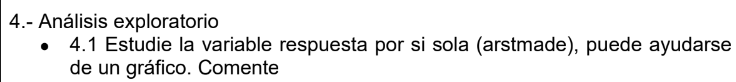

In [250]:
print(f"La columna arstmade es de tipo : {df_final['arstmade'].dtype}")


La columna arstmade es de tipo : category


Text(0, 0.5, 'Cantidad')

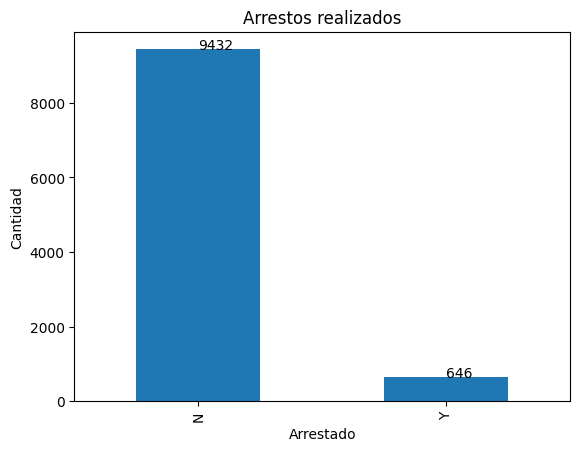

In [251]:
# Graficar arstmade 
df_final['arstmade'].value_counts().plot(kind='bar')

# agregar etiquetas con el valor de cada barra
for index, value in enumerate(df_final['arstmade'].value_counts()):
    plt.text(index, value, str(value))

# agregar titulo
plt.title('Arrestos realizados')

# agregar etiquetas a los ejes
plt.xlabel('Arrestado')
plt.ylabel('Cantidad')

In [252]:
# calcular porcentaje de arrestos realizados
totales = df_final['arstmade'].value_counts()
arrestos_realizados = totales[1]/totales.sum()*100
print(f"El porcentaje de arrestos realizados es: {arrestos_realizados:.2f}%")


El porcentaje de arrestos realizados es: 6.41%


In [253]:
# Como se puede ver del grafico de barras solo el 6.41% de los procedimientos policiales terminan en arresto.

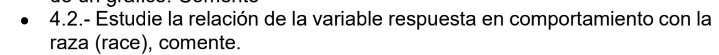

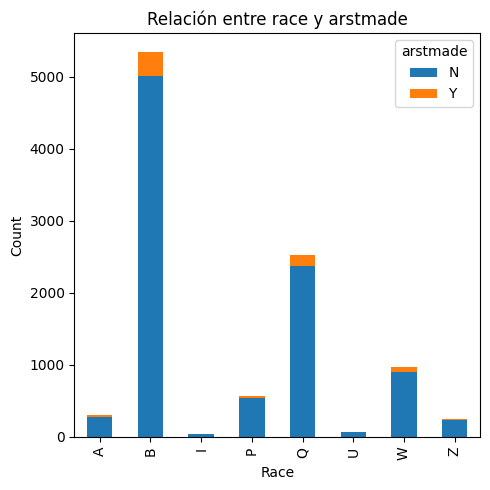

In [254]:
# Calcular la tabla de contingencia de 'race' y 'arstmade'
cross_tab = pd.crosstab(df_final['race'], df_final['arstmade'])

# Configurar el gráfico de barras apiladas
cross_tab.plot(kind='bar', stacked=True, figsize=(5, 5))
plt.title('Relación entre race y arstmade')
plt.xlabel('Race')
plt.ylabel('Count')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

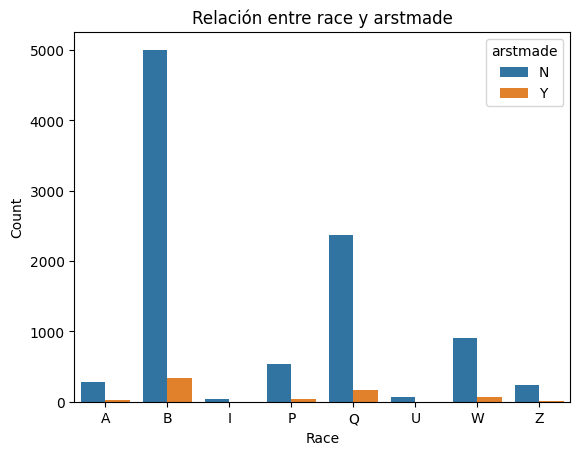

In [255]:
# Configurar el gráfico de barras con hue
sns.countplot(data=df_final, x='race', hue='arstmade')

# Agregar título y etiquetas de ejes
plt.title('Relación entre race y arstmade')
plt.xlabel('Race')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

In [256]:
for raza in df_final['race'].unique():
    filtro = df_final['race'] == raza
    totales = df_final[filtro]['arstmade'].value_counts()
    arrestos_realizados = totales[1]/totales.sum()*100
    print(f"El porcentaje de arrestos efectuados para la raza {raza} es del {arrestos_realizados:.2f}% de los procedimientos realizados.")

El porcentaje de arrestos efectuados para la raza B es del 6.29% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza Q es del 6.48% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza W es del 7.39% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza Z es del 6.40% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza P es del 6.09% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza A es del 6.69% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza U es del 4.35% de los procedimientos realizados.
El porcentaje de arrestos efectuados para la raza I es del 0.00% de los procedimientos realizados.


In [257]:
# De ambos gráficos se puede ver que la raza "B" presenta mayor frecuencia en los procedimientos policiales 
# tanto si terminan o no en arresto. Seguido estaría la raza "Q". 

# Tabién cabe destacar que la tasa arrestos realizados para la raza "W" es la mas alta. Es decir que es un poco mas frecuente que se arresten personas de raza "W" en 
# los procedimientos policiales.

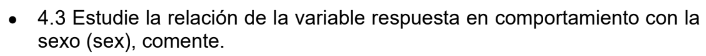

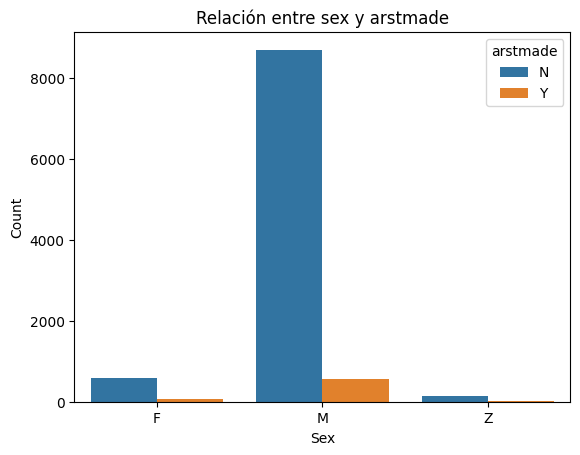

In [258]:
# Graficar arstmade vs se
sns.countplot(data=df_final, x='sex', hue='arstmade')

# Agregar título y etiquetas de ejes
plt.title('Relación entre sex y arstmade')
plt.xlabel('Sex')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

In [259]:
for sexo in df_final['sex'].unique():
    filtro = df_final['sex'] == sexo
    totales = df_final[filtro]['arstmade'].value_counts()
    arrestos_realizados = totales[1]/totales.sum()*100
    print(f"El porcentaje de arrestos efectuados para el sexo {sexo} es del {arrestos_realizados:.2f}% de los procedimientos realizados.")

El porcentaje de arrestos efectuados para el sexo M es del 6.19% de los procedimientos realizados.
El porcentaje de arrestos efectuados para el sexo Z es del 5.33% de los procedimientos realizados.
El porcentaje de arrestos efectuados para el sexo F es del 9.85% de los procedimientos realizados.


In [260]:
# Del gráfico se puede ver muy claramente que los hombres son los que más frecuentemente son arrestados y a quienes se les ejecuta mas
# procedimientos policiales.

# Por otro lado, es mas frecuente que los procedimientos policiales a mujeres terminen en arresto con un 9.85% de los casos.

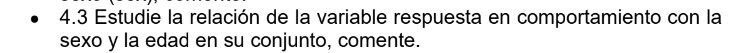

In [261]:
# Estudie la relación de la variable respuesta en comportamiento con la
# sexo y la edad en su conjunto, comente.

In [262]:
frecuencia_arstmade = df_final.groupby(['age','arstmade'])['sex'].value_counts().unstack().fillna(0)
# ordenar por edad ascendente
frecuencia_arstmade = frecuencia_arstmade.sort_index()

# resetear index
frecuencia_arstmade = frecuencia_arstmade.reset_index()

frecuencia_arstmade

sex,age,arstmade,F,M,Z
0,18,N,33,596,7
1,18,Y,3,53,0
2,19,N,35,648,14
3,19,Y,0,28,0
4,20,N,29,658,14
...,...,...,...,...,...
103,81,N,1,0,0
104,83,N,0,2,0
105,99,N,0,15,1
106,99,Y,0,1,0


Text(0.5, 1.0, 'Relación entre age y arstmade para el sexo Z')

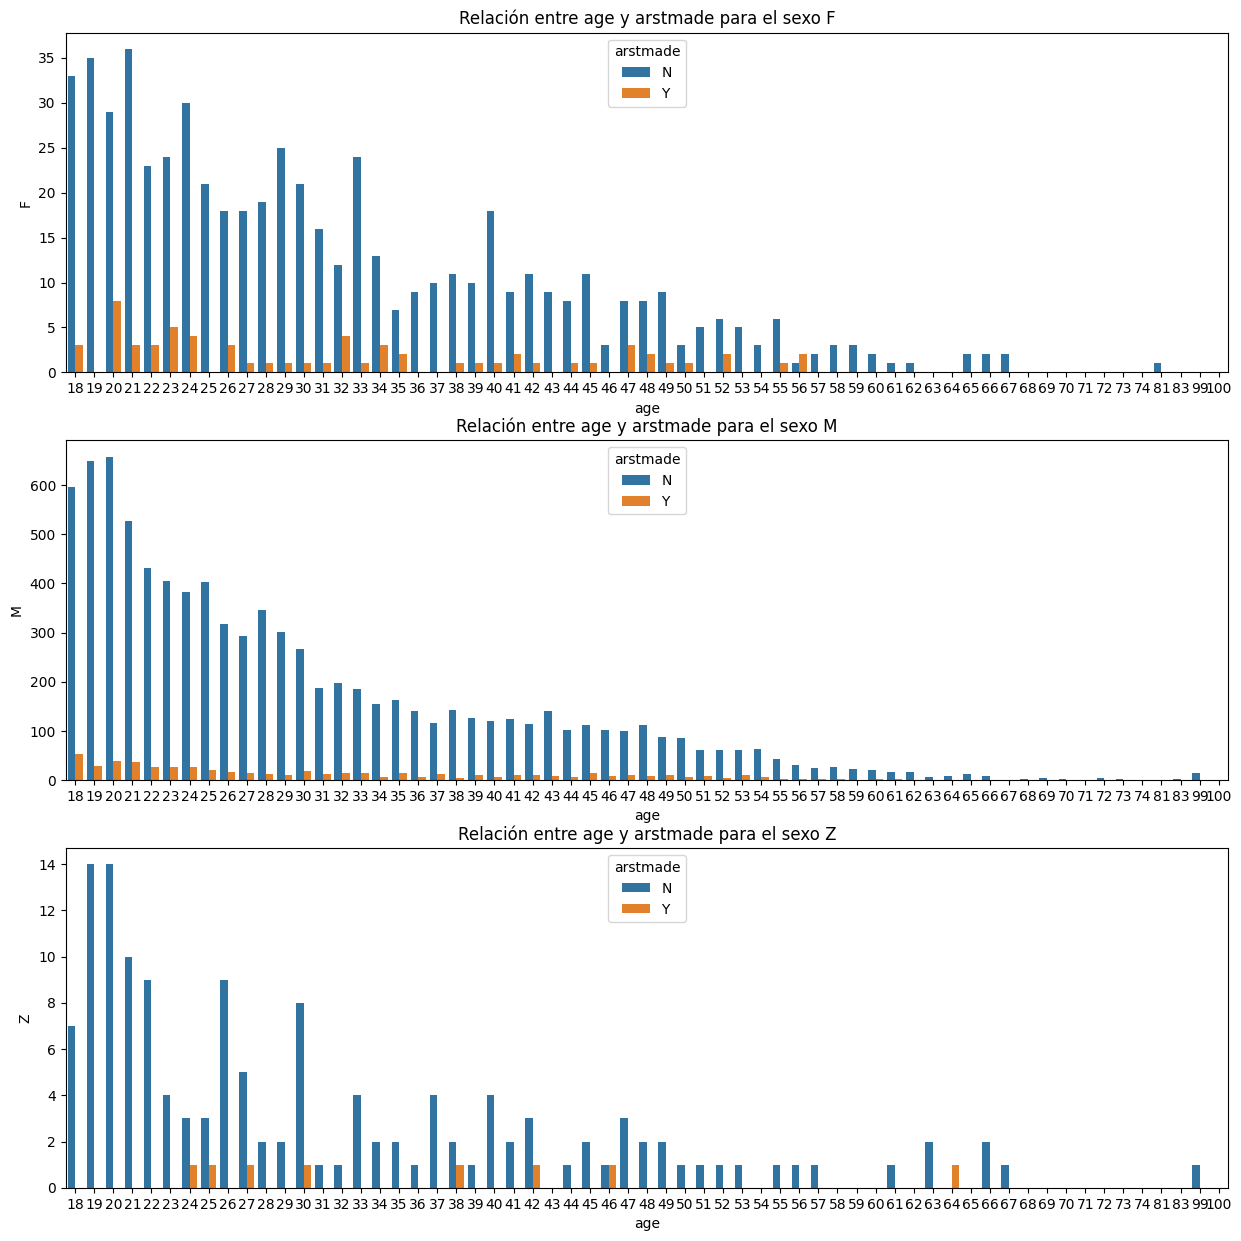

In [263]:
# Configurar el gráfico de barras
fig , axs = plt.subplots(3,1, figsize=(15, 15))

# Graficar para cada sexo
sns.barplot(data=frecuencia_arstmade, x='age', y='F', hue='arstmade' , ax=axs[0])
sns.barplot(data=frecuencia_arstmade, x='age', y='M', hue='arstmade' , ax=axs[1])
sns.barplot(data=frecuencia_arstmade, x='age', y='Z', hue='arstmade' , ax=axs[2])

# Agregar título
axs[0].set_title('Relación entre age y arstmade para el sexo F')
axs[1].set_title('Relación entre age y arstmade para el sexo M')
axs[2].set_title('Relación entre age y arstmade para el sexo Z')


In [264]:
# De la figura se puede ver que son los hombres de menor edad quienes mas frecuentemente son arrestados, y a medida que aumenta la edad su frecuencia de arresto disminuye.
# La mayoria de arrestos de hombres son los mas jovenes. Ademas los procedimientos policiales a hombres disminuyen su total a mayor edad. 

# En el caso de las mujeres se pueden ver intervalos irregulares de frecuencia de arresto, pero en general se puede ver que a medida que aumenta la edad 
# la frecuencia de arresto disminuye, siendo a partir de los 57 donde casi no hay arrestos para las mujeres.

# Para el sexo Z se puede ver que hay muy poca frecuencia de arresto, pero estas pocas son a partir de los 24 años.

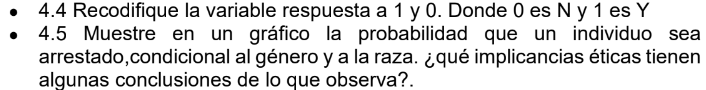

In [265]:
# Recodifique la variable arstamde a 1 y 0. Donde 0 es N y 1 es Y
df_final['arstmade'] = df_final['arstmade'].apply(lambda x: 1 if x == 'Y' else 0)
df_final['arstmade'].value_counts()

0    9432
1     646
Name: arstmade, dtype: int64

In [266]:
# Muestre en un gráfico la probabilidad que un individuo sea
# arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen
# algunas conclusiones de lo que observa?.

In [267]:
tabla = df_final.groupby(['race','sex'])['arstmade'].value_counts().unstack().fillna(0)
# resetear index
tabla

arstmade     0    1
race sex           
A    F      22    1
     M     256   19
     Z       1    0
B    F     279   39
     M    4703  297
     Z      24    0
I    F       2    0
     M      35    0
P    F      23    3
     M     514   32
     Z       3    0
Q    F     146   11
     M    2208  151
     Z      14    2
U    F       7    0
     M      55    2
     Z       4    1
W    F      92   10
     M     805   62
     Z       5    0
Z    F      15    0
     M     128   11
     Z      91    5

In [268]:
# Calcular la probabilidad de arresto por combinación de 'race' y 'sex'
prob_arresto = df_final.groupby(['race', 'sex']).apply(lambda x: (x['arstmade'] == 1).mean())

# resetear index
prob_arresto = prob_arresto.reset_index()

# poenr nombre a la columna de probabilidad
prob_arresto = prob_arresto.rename(columns={0: 'prob_arresto'})

# ordenar por probabilidad descendente
prob_arresto = prob_arresto.sort_values(by='prob_arresto', ascending=False)

prob_arresto

,race,sex,prob_arresto
16,U,Z,0.200000
13,Q,Z,0.125000
3,B,F,0.122642
8,P,F,0.115385
17,W,F,0.098039
21,Z,M,0.079137
18,W,M,0.071511
11,Q,F,0.070064
1,A,M,0.069091
12,Q,M,0.064010


Text(0.5, 1.0, 'Probabilidad de arrestos por sexo y raza')

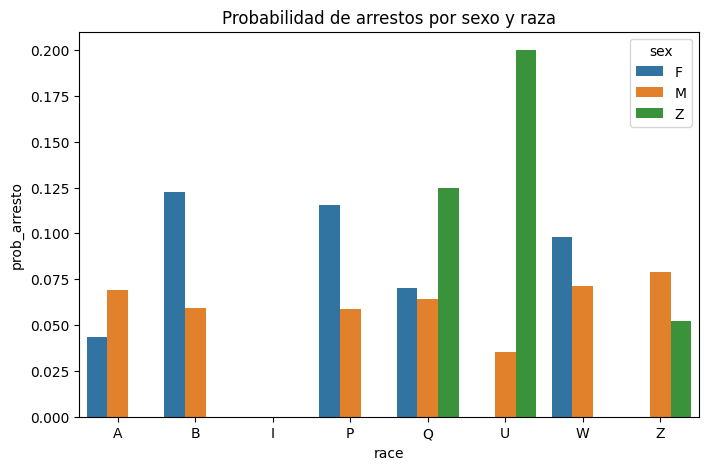

In [269]:

fig , axs = plt.subplots(figsize=(8,5))

sns.barplot(data=prob_arresto, x='race', y='prob_arresto', hue='sex')

# setear titulo
plt.title("Probabilidad de arrestos por sexo y raza")


In [270]:
# Del gráfico se puede ver que si eres del sexo Z, de raza U y te están realizando un procedimiento policial, tienes la mayor probabilidad de ser arrestado, ya que
# el 12.5% de los procedimientos policiales para ese sexo y raza terminan en arresto.

# Tambien se puede ver que en 3 de las 8 razas las mujeres tienen mayor probabilidad de ser arrestadas en un procedimiento policial. 

# Las mujeres de raza B son quienes tienen mayor probabilidad de ser arrestadas en un procedimiento policial con el 12.26% de los casos, seguido de las de raza P con un 11.53%

#En el caso de los hombres de raza Z son quienes tienen mas probabilidad de ser arrestados en un procedimiento policial con el 7.9% de los casos, 
# seguido de los de raza W con un 7.1%. Contrario a lo que se puede pensar, los hombres de raza negra ("B") tienen un 5.9% de probabilidad de ser arrestados 
# en un procedimiento policial realizado, es decir cerca de un 2% menos que los hombres de raza blanca ("W").

# Hay que tener cuidado al leer este grfico ya que las probabilidades mostradas están condicionadas a la raza y al sexo de la persona al momento de ser procesada 
# por la policía. En ningun caso son probabilidades generales. 


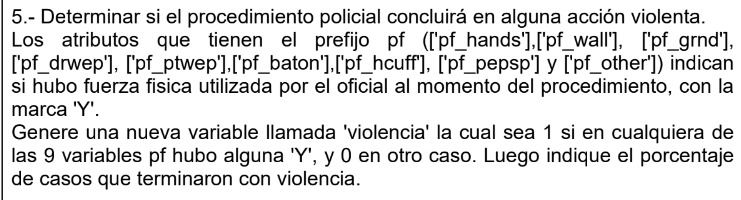

In [271]:
# crear lista con columnas pf
columnas_pf = ['pf_hands','pf_wall', 'pf_grnd','pf_drwep', 'pf_ptwep','pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other']


In [272]:
# Generar la nueva variable 'violencia'
df_final['violencia'] = df_final[columnas_pf].apply(lambda x: 1 if (x == 'Y').any() else 0, axis=1)

# setear violencia como category
df_final['violencia'] = df_final['violencia'].astype('category')

In [273]:
df_final['violencia'].value_counts()

0    7641
1    2437
Name: violencia, dtype: int64

In [274]:
# porcentaje de casos con violencia
porcentaje_violencia = df_final['violencia'].value_counts()[1]/df_final['violencia'].value_counts().sum()*100
print(f"El {porcentaje_violencia:.2f}% de los casos presentan violencia")

El 24.18% de los casos presentan violencia


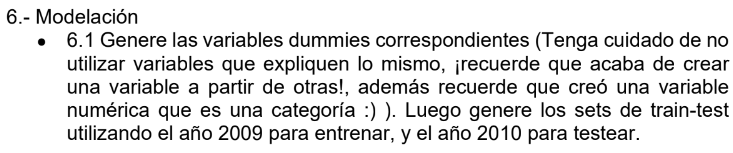

In [275]:
# columnas para modelo
columnas_modelo = ['sex','race','violencia','age','arstmade','year','meters','trhsloc','beat','sector','officrid','offshld','offverb']
columnas_modelo = ['sex','race','violencia','age','arstmade','year','meters','haircolr','eyecolor']


df_modelo = df_final[columnas_modelo]
df_modelo


,sex,race,violencia,age,arstmade,year,meters,haircolr,eyecolor
0,M,B,0,24,0,2009,4.2672,BK,BR
2,M,Q,0,21,0,2009,2.7432,BR,BR
3,M,B,0,22,0,2009,3.0480,BK,BR
4,M,Q,0,18,0,2009,3.3528,BK,BR
5,M,B,0,47,0,2009,3.9624,BK,BR
...,...,...,...,...,...,...,...,...,...
6007,F,Q,0,21,0,2010,3.3528,BR,BR
6008,M,B,1,20,0,2010,4.5720,BK,BR
6009,M,Z,0,23,0,2010,3.6576,BK,BR
6011,M,Q,1,19,0,2010,4.8768,BK,BR


In [276]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10078 entries, 0 to 6012
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        10078 non-null  category
 1   race       10078 non-null  category
 2   violencia  10078 non-null  category
 3   age        10078 non-null  int64   
 4   arstmade   10078 non-null  category
 5   year       10078 non-null  int64   
 6   meters     10078 non-null  float64 
 7   haircolr   10078 non-null  category
 8   eyecolor   10078 non-null  category
dtypes: category(6), float64(1), int64(2)
memory usage: 375.5 KB


In [277]:
# generar dummies para sexo, raza y violencia

df_dummies = pd.get_dummies(df_modelo, columns=['race','sex','violencia','haircolr','eyecolor'])

In [278]:
df_dummies

,age,arstmade,year,meters,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z,sex_F,sex_M,sex_Z,violencia_0,violencia_1,haircolr_BA,haircolr_BK,haircolr_BL,haircolr_BR,haircolr_DY,haircolr_GY,haircolr_RA,haircolr_SN,haircolr_SP,haircolr_XX,haircolr_ZZ,eyecolor_BK,eyecolor_BL,eyecolor_BR,eyecolor_DF,eyecolor_GR,eyecolor_GY,eyecolor_HA,eyecolor_MA,eyecolor_VI,eyecolor_XX,eyecolor_Z
0,24,0,2009,4.2672,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,21,0,2009,2.7432,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,22,0,2009,3.0480,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,18,0,2009,3.3528,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,47,0,2009,3.9624,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,21,0,2010,3.3528,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6008,20,0,2010,4.5720,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6009,23,0,2010,3.6576,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6011,19,0,2010,4.8768,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [279]:
# gener year 2009 como train y 2010 como test
df_train = df_dummies[df_dummies['year'] == 2009]
df_test = df_dummies[df_dummies['year'] == 2010]

df_train = df_train.drop(columns=['year'])
df_test = df_test.drop(columns=['year'])

In [280]:
df_train

,age,arstmade,meters,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z,sex_F,sex_M,sex_Z,violencia_0,violencia_1,haircolr_BA,haircolr_BK,haircolr_BL,haircolr_BR,haircolr_DY,haircolr_GY,haircolr_RA,haircolr_SN,haircolr_SP,haircolr_XX,haircolr_ZZ,eyecolor_BK,eyecolor_BL,eyecolor_BR,eyecolor_DF,eyecolor_GR,eyecolor_GY,eyecolor_HA,eyecolor_MA,eyecolor_VI,eyecolor_XX,eyecolor_Z
0,24,0,4.2672,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,21,0,2.7432,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,22,0,3.0480,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,18,0,3.3528,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,47,0,3.9624,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,30,0,4.5720,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5808,19,0,4.8768,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5809,30,0,3.6576,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5810,31,1,3.9624,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [281]:
df_test

,age,arstmade,meters,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z,sex_F,sex_M,sex_Z,violencia_0,violencia_1,haircolr_BA,haircolr_BK,haircolr_BL,haircolr_BR,haircolr_DY,haircolr_GY,haircolr_RA,haircolr_SN,haircolr_SP,haircolr_XX,haircolr_ZZ,eyecolor_BK,eyecolor_BL,eyecolor_BR,eyecolor_DF,eyecolor_GR,eyecolor_GY,eyecolor_HA,eyecolor_MA,eyecolor_VI,eyecolor_XX,eyecolor_Z
0,47,0,1.8288,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,19,0,2.1336,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,45,0,2.1336,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,22,0,2.1336,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,43,0,4.5720,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,21,0,3.3528,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6008,20,0,4.5720,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6009,23,0,3.6576,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6011,19,0,4.8768,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


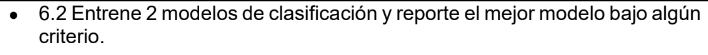

In [282]:
# entrenar 2 modelos de clasificación
# importar random forest


# instanciar modelos
logreg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=3)
randomforest = RandomForestClassifier(max_depth=3, n_estimators=100)

# entrenar modelos
logreg.fit(df_train.drop(columns=['arstmade']), df_train['arstmade'])
tree.fit(df_train.drop(columns=['arstmade']), df_train['arstmade'])
randomforest.fit(df_train.drop(columns=['arstmade']), df_train['arstmade'])


# predecir con modelos
y_pred_logreg = logreg.predict(df_test.drop(columns=['arstmade']))
y_pred_tree = tree.predict(df_test.drop(columns=['arstmade']))
y_pred_randomforest = randomforest.predict(df_test.drop(columns=['arstmade']))



c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [283]:
# calcular metricas
acc_logreg = accuracy_score(df_test['arstmade'], y_pred_logreg)
acc_tree = accuracy_score(df_test['arstmade'], y_pred_tree)
acc_randomforest = accuracy_score(df_test['arstmade'], y_pred_randomforest)

print(f"El accuracy de logreg es: {acc_logreg:.2f}")
print(f"El accuracy de tree es: {acc_tree:.2f}")
print(f"El accuracy de randomforest es: {acc_randomforest:.2f}")
print()




El accuracy de logreg es: 0.93
El accuracy de tree es: 0.93
El accuracy de randomforest es: 0.93



Text(0.5, 1.0, 'Confusion Matrix Random Forest')

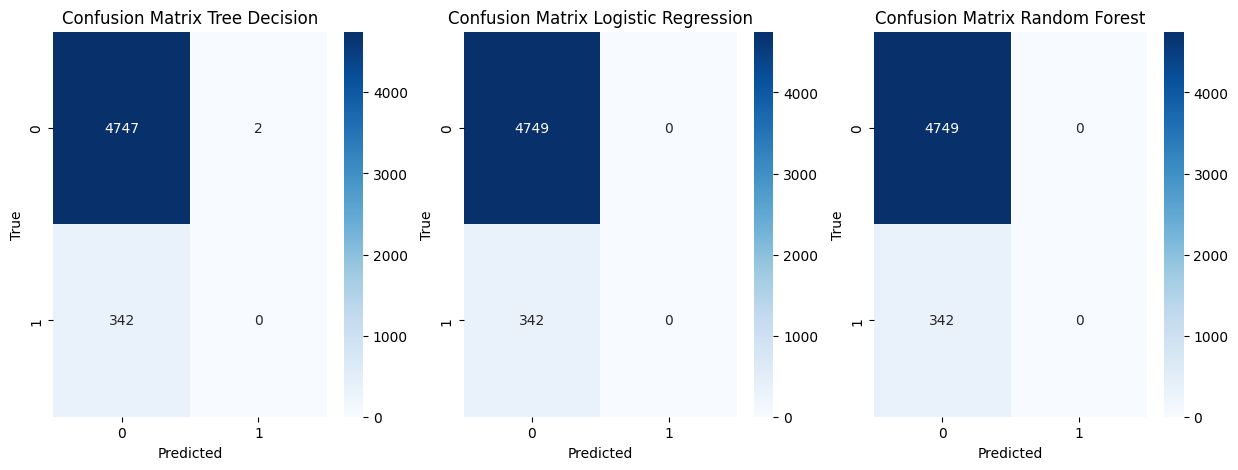

In [284]:
# Generate the confusion matrix
cm_tree = confusion_matrix(df_test['arstmade'], y_pred_tree)
cm_logreg = confusion_matrix(df_test['arstmade'], y_pred_logreg)
cm_randomforest = confusion_matrix(df_test['arstmade'], y_pred_randomforest)

fig,axs = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(cm_tree, annot=True, cmap="Blues", fmt="d", ax=axs[0])
sns.heatmap(cm_logreg, annot=True, cmap="Blues", fmt="d", ax=axs[1])
sns.heatmap(cm_randomforest, annot=True, cmap="Blues", fmt="d", ax=axs[2])


axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
axs[0].set_title('Confusion Matrix Tree Decision')

axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
axs[1].set_title('Confusion Matrix Logistic Regression')

axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')
axs[2].set_title('Confusion Matrix Random Forest')


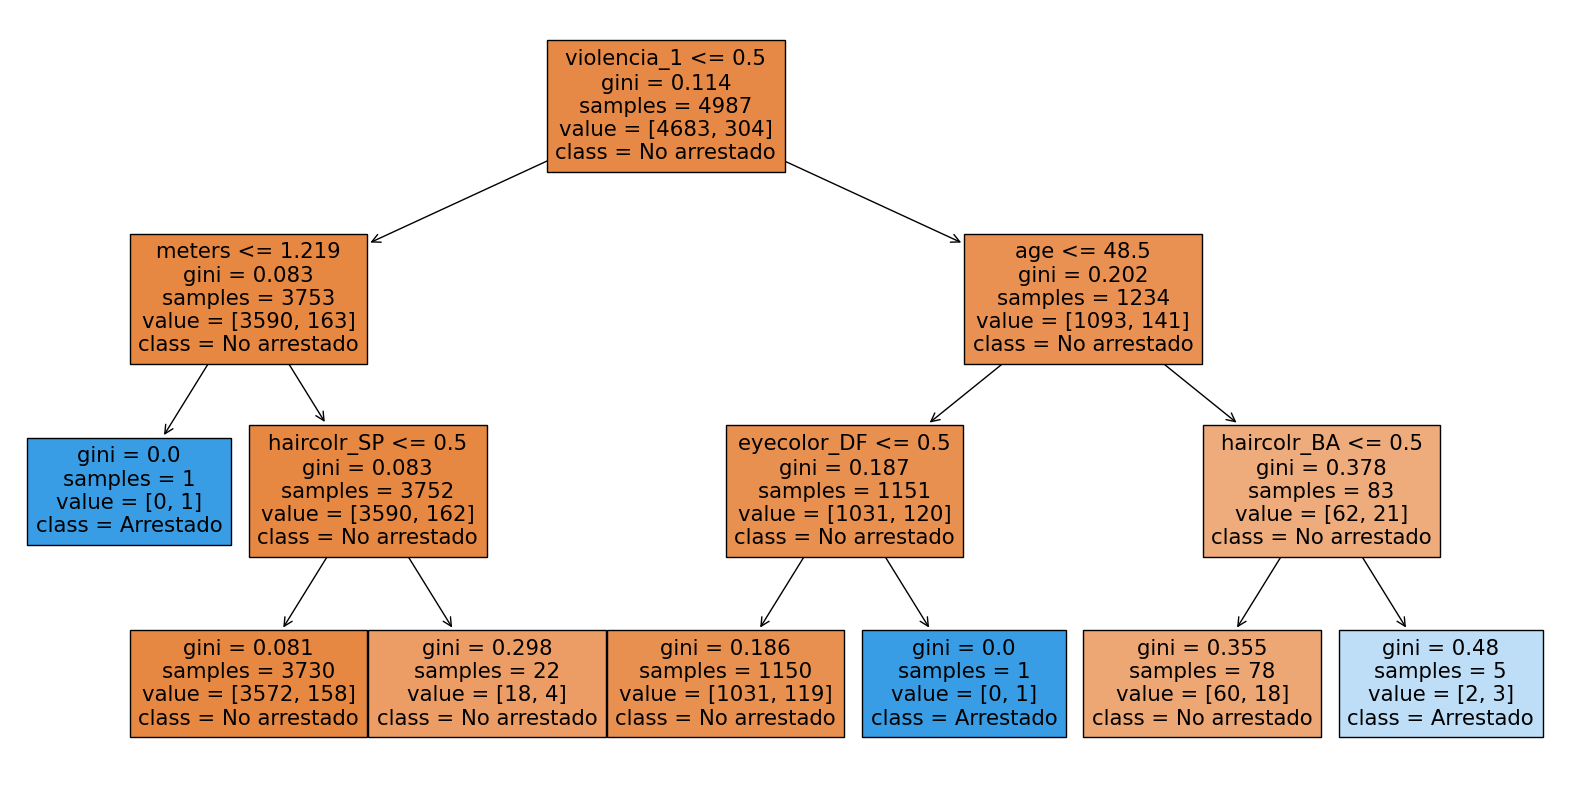

In [285]:
# graficar tree 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=df_train.drop(columns=['arstmade']).columns, class_names=['No arrestado', 'Arrestado'])

plt.show()


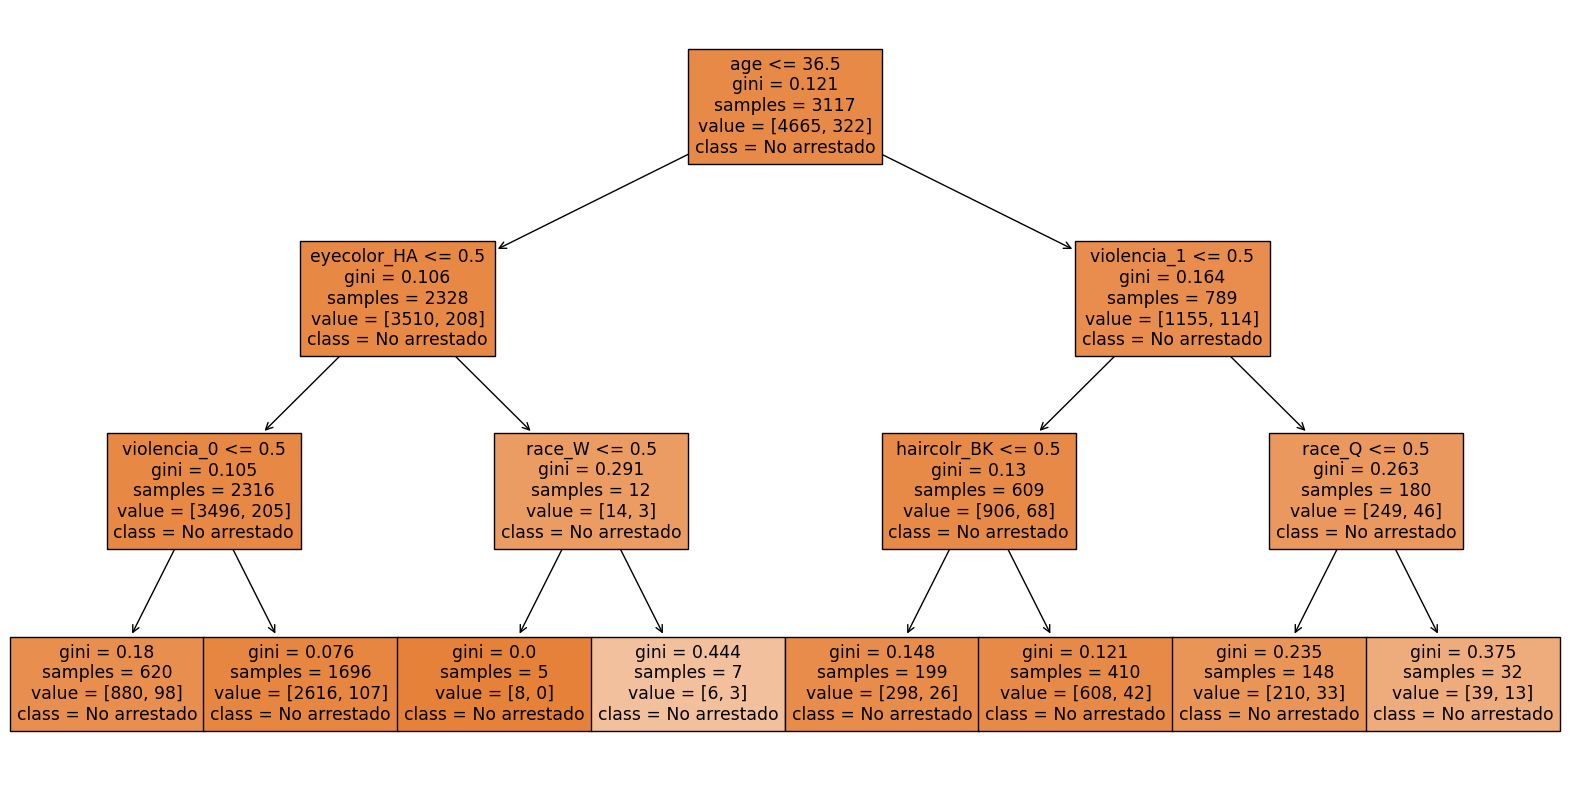

In [286]:
# graficar randomforest
plt.figure(figsize=(20,10))
plot_tree(randomforest.estimators_[0], filled=True, feature_names=df_train.drop(columns=['arstmade']).columns, class_names=['No arrestado', 'Arrestado'])
plt.show()


In [287]:
# Para los 3 modelos entenados se obtuvo el mismo accuracy de 0.93. Sin embargo, al observar las matrices de confusión se puede ver que el modelo de TreeClasifier
# clasificó al menos 4 procedimientos como arrestos, de los cuales 3 estaban mal clasificados. 
# Por otro lado, los modelos de regresión logística y random forest no clasificaron ningún procedimiento como arresto, por lo que no se equivocaron en ese caso.

# En sintesis los tres modelos prácricamente clasifican todos los procedimientos como no arrestos, por lo que no son buenos modelos para predecir. 

# Si se tuviera que escoger uno seria el random forest ya es mas visual y al establecer parámetros de poda se puede obtener un modelo que se ajuste mejor nuevos set de datos.

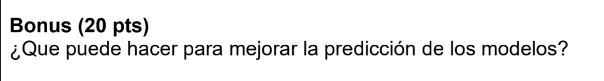

In [288]:
# Si se desea mejora la predicción se puede realizar una busqueda de mejores hiperparametros o tuning del modelo escogido, mediante el uso de GridSearchCV.
# Con una validación cruzada de 10 folderas se podría generar la busqueda de los mejores hiperparametros y así ver si las métricas mejoran.